In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-users-of-a-french-c2c-fashion-store/comparison_of_sellers_by_gender_and_country.csv
/kaggle/input/ecommerce-users-of-a-french-c2c-fashion-store/6M-0K-99K.users.dataset.public.csv
/kaggle/input/ecommerce-users-of-a-french-c2c-fashion-store/users.6M0xxK.2020.public.csv
/kaggle/input/ecommerce-users-of-a-french-c2c-fashion-store/countries_with_top_sellers_fashion_c2c.csv
/kaggle/input/ecommerce-users-of-a-french-c2c-fashion-store/users.6M0xxK.2024.public.csv


In [2]:
import numpy as np 
import pandas as pd 

db = pd.read_csv('/kaggle/input/ecommerce-users-of-a-french-c2c-fashion-store/6M-0K-99K.users.dataset.public.csv')
db.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-1097895247965112460,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,2347567364561867620,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,6870940546848049750,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,-4640272621319568052,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,-5175830994878542658,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [3]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [4]:
#checking if there is any missing value
db.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

Text(0.5, 1.0, 'hasAnyApp Bins')

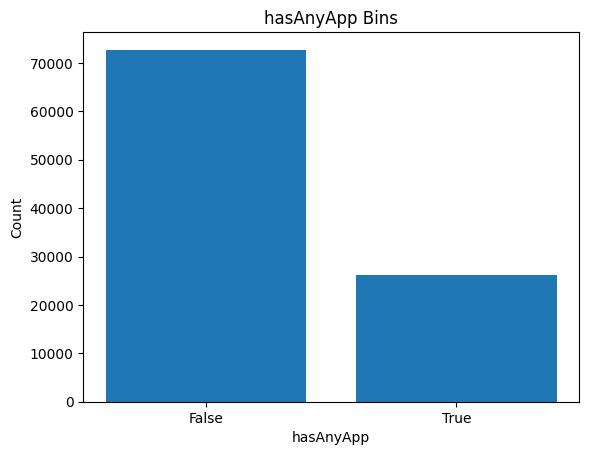

In [5]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=['False','True']
q=pyplot.bar(group_names, db['hasAnyApp'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("hasAnyApp")
plt.pyplot.ylabel("Count")
plt.pyplot.title("hasAnyApp Bins")

In [6]:
df_group_two = db[['hasAnyApp','productsBought','productsSold']]
df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
df_group_two

/tmp/ipykernel_18/3675444363.py:2: FutureWarning: The provided callable <function sum at 0x7e30fc123520> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
/tmp/ipykernel_18/3675444363.py:2: FutureWarning: The provided callable <function mean at 0x7e30fc1504c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])


hasAnyApp productsBought           productsSold          
                       sum      mean          sum      mean
0     False           7957  0.109391         3233  0.044447
1      True           9049  0.345725         8794  0.335982

Text(0.5, 1.0, 'civilityTitle Bins')

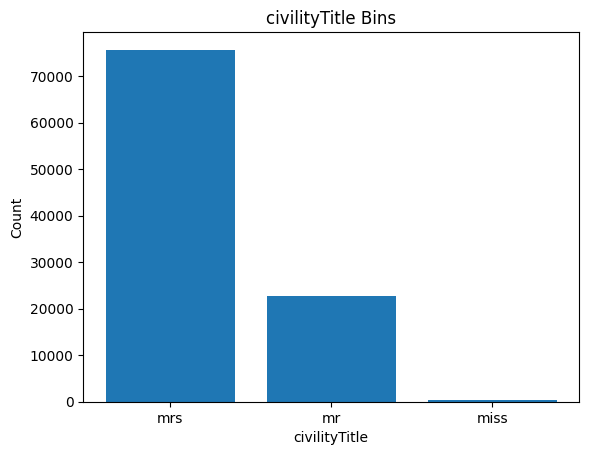

In [7]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=['mrs','mr','miss']
pyplot.bar(group_names, height=db['civilityTitle'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("civilityTitle")
plt.pyplot.ylabel("Count")
plt.pyplot.title("civilityTitle Bins")

In [8]:
df_group_one = db[['civilityTitle','productsBought','productsSold']]
df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
df_group_one

/tmp/ipykernel_18/3517141676.py:2: FutureWarning: The provided callable <function sum at 0x7e30fc123520> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
/tmp/ipykernel_18/3517141676.py:2: FutureWarning: The provided callable <function mean at 0x7e30fc1504c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_one = df_group_one.groupby(['civilityTitle'],as_index=False).agg([np.sum,np.mean])
/tmp/ipykernel_18/3517141676.py:2: FutureWarning: The provided callable <function sum at 0x7e30fc123520> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string

civilityTitle productsBought           productsSold          
                           sum      mean          sum      mean
0          miss            287  0.656751          574  1.313501
1            mr           4262  0.186995         2673  0.117278
2           mrs          12457  0.164592         8780  0.116009

Text(0.5, 1.0, 'language Bins')

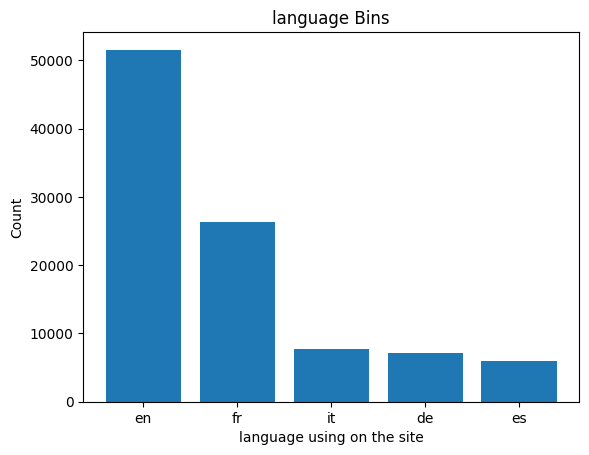

In [9]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=['en', 'fr', 'it', 'de', 'es']
q=pyplot.bar(group_names, db['language'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("language using on the site")
plt.pyplot.ylabel("Count")
plt.pyplot.title("language Bins")

In [10]:
df_group_three = db[['language','productsBought','productsSold']]
df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
df_group_three

/tmp/ipykernel_18/95561689.py:2: FutureWarning: The provided callable <function sum at 0x7e30fc123520> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
/tmp/ipykernel_18/95561689.py:2: FutureWarning: The provided callable <function mean at 0x7e30fc1504c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
/tmp/ipykernel_18/95561689.py:2: FutureWarning: The provided callable <function sum at 0x7e30fc123520> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" i

language productsBought           productsSold          
                      sum      mean          sum      mean
0       de           1705  0.237531          539  0.075091
1       en           8918  0.172950         4877  0.094581
2       es            797  0.132107          901  0.149345
3       fr           4386  0.166313         3004  0.113909
4       it           1200  0.154520         2706  0.348442

<Axes: xlabel='language', ylabel='count'>

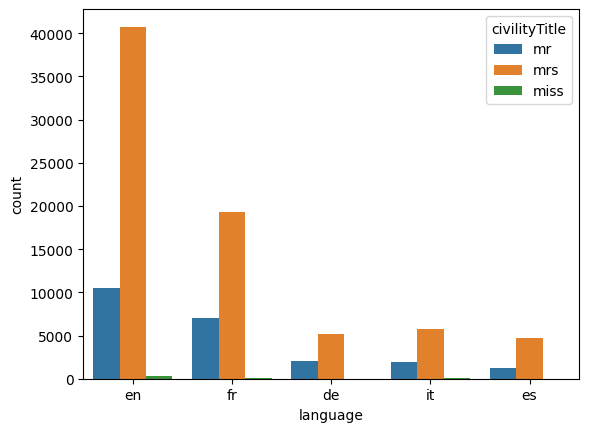

In [11]:
import seaborn as sns
sns.countplot(x='language',data=db,hue='civilityTitle') 

In [12]:
repeat_columns = []
# unused and repeated metadata are dropped
repeat_columns += ['identifierHash', 'type','country','gender','civilityTitle']
db1=db.drop(repeat_columns,axis=1)
db1.head()

,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,en,147,10,77,26,174,74.0,104,1,1,True,False,True,True,11,3196,106.53,8.88,gb
1,en,167,8,2,19,170,99.0,0,0,2,True,False,True,True,12,3204,106.80,8.90,mc
2,fr,137,13,60,33,163,94.0,10,3,2,True,False,True,False,11,3203,106.77,8.90,fr
3,en,131,10,14,122,152,92.0,7,0,2,True,False,True,False,12,3198,106.60,8.88,us
4,en,167,8,0,25,125,100.0,0,0,2,False,False,False,True,22,2854,95.13,7.93,us


In [13]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

string_columns = ['language','countryCode','hasAnyApp','hasAndroidApp','hasIosApp','hasProfilePicture']

for var in string_columns:
    var_cat = db[[var]] #use double brakets to make sure i'm taking a dataframe 
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat)
    var_cat_df = pd.DataFrame(var_cat_encoded)
    var_cat_df.columns = [var + '_encoded'] 
    db1 = db1.merge(var_cat_df, how = 'inner', left_index = True, right_index = True)

db2 = db1.drop(string_columns, axis = 1)
db2.head()
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   socialNbFollowers          98913 non-null  int64  
 1   socialNbFollows            98913 non-null  int64  
 2   socialProductsLiked        98913 non-null  int64  
 3   productsListed             98913 non-null  int64  
 4   productsSold               98913 non-null  int64  
 5   productsPassRate           98913 non-null  float64
 6   productsWished             98913 non-null  int64  
 7   productsBought             98913 non-null  int64  
 8   civilityGenderId           98913 non-null  int64  
 9   daysSinceLastLogin         98913 non-null  int64  
 10  seniority                  98913 non-null  int64  
 11  seniorityAsMonths          98913 non-null  float64
 12  seniorityAsYears           98913 non-null  float64
 13  language_encoded           98913 non-null  flo

Text(0.5, 1.0, 'Heatmap of Correlation Matrix for All Users')

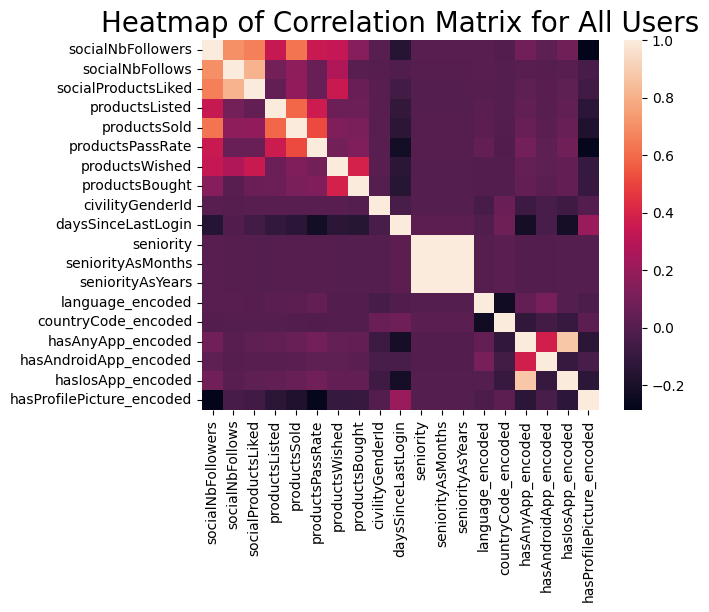

In [14]:
import seaborn as sns
a=sns.heatmap(db2.corr()) 
a.set_title('Heatmap of Correlation Matrix for All Users', fontsize = 20)

In [15]:
#remove variables with no correlations
no_columns=['seniority','seniorityAsMonths','seniorityAsYears']

db3 = db2.drop(no_columns, axis = 1)

In [16]:
print("Original dataset before filtering", db.shape)
print("Remanining data after filtering variables with no correlations:\n",db3.shape)
db_final = db3.sample(frac = 0.3)
print("\n Final shrinking columns: \n",db_final.columns)
print("\n Final shrinking data: \n",db_final.shape)

Original dataset before filtering (98913, 24)
Remanining data after filtering variables with no correlations:
 (98913, 16)

 Final shrinking columns: 
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'civilityGenderId', 'daysSinceLastLogin',
       'language_encoded', 'countryCode_encoded', 'hasAnyApp_encoded',
       'hasAndroidApp_encoded', 'hasIosApp_encoded',
       'hasProfilePicture_encoded'],
      dtype='object')

 Final shrinking data: 
 (29674, 16)


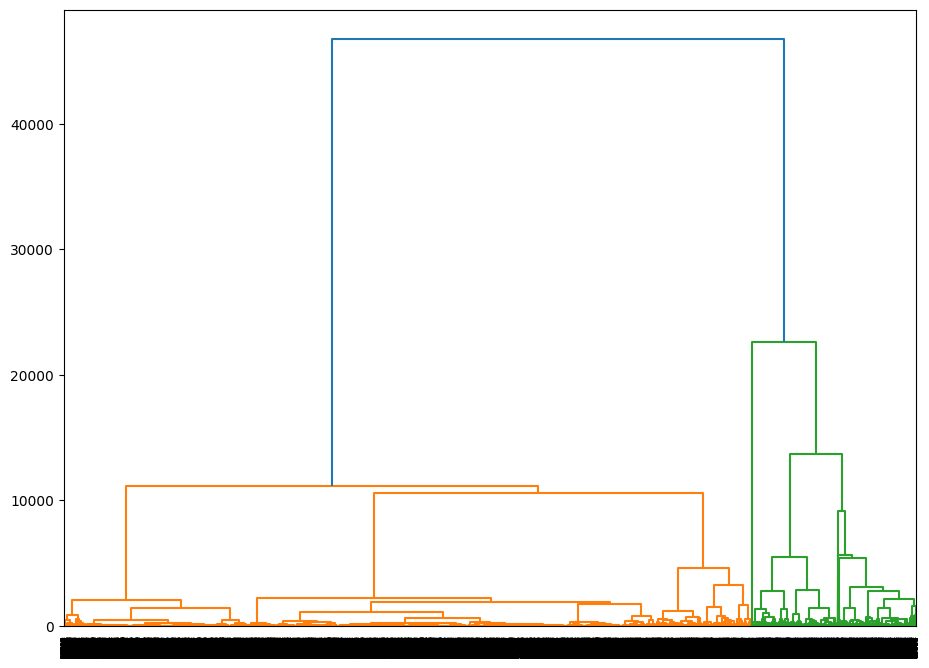

In [17]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
fig = plt.figure(figsize = (11, 8))
dendogram = sch.dendrogram(sch.linkage(db_final,method = 'ward'))

In [18]:
def helper_has_fields_compared_to(df, columns, target, what, operator):
   
    #Helper to compare several columns to the same value.

    col = columns[0]
    if operator == '>':
        res = (df[col] > target)
    elif operator == '>=':
        res = (df[col] >= target)
    elif operator == '<=':
        res = (df[col] <= target)
    elif operator == '<':
        res = (df[col] < target)
    elif operator == '==':
        res = (df[col] == target)
    elif operator == '!=':
        res = (df[col] != target)  
    for col in columns[1:]:
        if operator == '>':
            tmp = (df[col] > target)
        elif operator == '>=':
            tmp = (df[col] >= target)
        elif operator == '<=':
            tmp = (df[col] <= target)
        elif operator == '<':
            tmp = (df[col] < target)
        elif operator == '==':
            tmp = (df[col] == target)
        elif operator == '!=':
            tmp = (df[col] != target)
        if what == 'all':
            res = res & tmp
        elif what in ['any']:
            res = res | tmp
    return res

def helper_has_any_field_greater_than(df, columns, target):
    #Returns lines of the dataframe where any of value of the specified columns is greater than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'any', '>')
    return res

def helper_has_any_field_smaller_than(df, columns, target):
    #Returns lines of the dataframe where any of value of the specified columns is smaller than the target.
    
    res = helper_has_fields_compared_to(df, columns, target, 'any', '<')
    return res

def helper_has_all_field_greater_than(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '>')
    return res

def helper_has_all_field_smaller_than(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '<')
    return res

def helper_has_all_field_equal_to(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is equal to the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '==')
    return res

In [19]:
Users_db = db3[helper_has_any_field_greater_than(db3,['productsSold','productsBought'],0)]
print(f"Actual Users: {Users_db.shape[0]} ")
#Users_db.sample(12)

# Active Actual Users with social interaction except transaction
AActive_db = Users_db[helper_has_any_field_greater_than(Users_db,['socialProductsLiked', 'productsListed',
       'productsPassRate', 'productsWished'], 0)]
AActive_db.dataframeName = "Active Actual Users"
print(f"Actal Active Users: {AActive_db.shape[0]}")
#Active_db.sample(12)

## Actual Buyers
buyers_db = db3[db3.productsBought > 0]
buyers_db.dataframeName = "Buyers"
print("Actual buyers: ", buyers_db.shape[0])


## Sellers
sellers_db = db3[(db3.productsListed > 0) | (db3.productsSold > 0)]
sellers_db.dataframeName = "Prospecting Sellers"
print("Prospecting sellers: ",sellers_db.shape[0])

### actual sellers (at least 1 product sold)
successful_sellers_db = db3[db3.productsSold > 0]
successful_sellers_db.dataframeName = "Actual sellers"
print("Actual sellers: ", successful_sellers_db.shape[0])

# Social Users with no transaction but social interaction
#by looking at the data, we could easily conclude that 
# each new account is automatically assigned 3 followers and 8 accounts to follow
social_db = db3[ (db3['socialNbFollowers'] != 3) | (db3['socialNbFollows'] != 8) ]
social_db1=social_db[helper_has_all_field_smaller_than(social_db,['productsSold','productsBought'],1)]
#Among those social users, filter only those active on products 
market_social_db = social_db1[helper_has_any_field_greater_than(social_db1, ['socialProductsLiked', 'productsListed',
       'productsPassRate', 'productsWished'], 0)]
print(f"Potential Social Users: {market_social_db.shape[0]}")
#market_social_db.sample(12)

Actual Users: 6893 
Actal Active Users: 4894
Actual buyers:  5419
Prospecting sellers:  2719
Actual sellers:  2036
Potential Social Users: 3679


In [20]:
print(f"""In average, buyers buy {buyers_db.productsBought.sum() / buyers_db.shape[0] :.2f} products. Details are as follows:""")

#successful buyers
Sbuyers_db = db3[db3.productsBought >= 3]
Sbuyers_db.dataframeName = "SBuyers"
print("Accordingly, Successful buyers: ", Sbuyers_db.shape[0])
buyers_db.productsBought.describe()

In average, buyers buy 3.14 products. Details are as follows:
Accordingly, Successful buyers:  1277


count    5419.000000
mean        3.138217
std         9.486478
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       405.000000
Name: productsBought, dtype: float64

In [21]:
Sbuyers_db.socialNbFollowers.describe()

count    1277.000000
mean        8.577917
std        10.768492
min         3.000000
25%         4.000000
50%         5.000000
75%         8.000000
max       137.000000
Name: socialNbFollowers, dtype: float64

In [22]:
print(f"""In average, actual sellers sell {successful_sellers_db.productsSold.sum() / successful_sellers_db.shape[0] :.2f} products. Details are as follows:""")
#successful sellers
Ssellers_db = db3[db3.productsSold >= 6]
Ssellers_db.dataframeName = "SSellers"
print("Accordingly, Successful sellers: ", Ssellers_db.shape[0])
successful_sellers_db.productsSold.describe()

In average, actual sellers sell 5.91 products. Details are as follows:
Accordingly, Successful sellers:  458


count    2036.000000
mean        5.907171
std        13.626529
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       174.000000
Name: productsSold, dtype: float64

In [23]:
productsH_db = db3[db3.productsPassRate >= 90]
productsH_db.dataframeName = "Best quality's store"
print("Numbers of sellers with the highest quality: ", productsH_db.shape[0])

productsMh_db = db3[(db3.productsPassRate >= 80) & (db3.productsPassRate < 90)]
productsMh_db.dataframeName = "medium-high quality's store"
print("Numbers of sellers with the Medium-high quality: ", productsMh_db.shape[0])

productsS_db = db3[(db3.productsPassRate >= 60) &  (db3.productsPassRate < 80)]
productsS_db.dataframeName = "Standard qualisty's store"
print("Numbers of sellers with the stadard quality: ", productsS_db.shape[0])

productsU_db = db3[(db3.productsPassRate < 60) &  (db3.productsPassRate > 0)]
productsU_db.dataframeName = "Unqualified store"
print("Numbers of sellers with low quality: ", productsU_db.shape[0]+
      (successful_sellers_db.shape[0]-productsH_db.shape[0]-productsMh_db.shape[0]-productsS_db.shape[0]-productsU_db.shape[0]))

Numbers of sellers with the highest quality:  539
Numbers of sellers with the Medium-high quality:  129
Numbers of sellers with the stadard quality:  174
Numbers of sellers with low quality:  1194


In [24]:
print(f"""In average, active low quality sellers sell {productsU_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active standard quality sellers sell {productsS_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active medium-high quality sellers sell {productsMh_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active high quality sellers sell {productsH_db.productsSold.sum() / sellers_db.shape[0] :.2f} products. Details are as follows:""")
productsH_db.productsSold.describe()

In average, active low quality sellers sell 0.24 
In average, active standard quality sellers sell 0.60 
In average, active medium-high quality sellers sell 0.77 
In average, active high quality sellers sell 2.31 products. Details are as follows:


count    539.000000
mean      11.653061
std       20.687448
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      170.000000
Name: productsSold, dtype: float64